Cheking list  
https://www.machinelearningplus.com/time-series/time-series-analysis-python/

2. Stationary and non-stationary Time Series
3. How to make a Time Series stationary?
4. How to test for stationarity?


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


train = pd.read_csv('/content/drive/MyDrive/dmp/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dmp/test.csv')

In [ ]:
for i in range(len(train.columns)):
  if train.columns[i][-7:] == 'Request':
       train[train.columns[i][:-7]+'ratio'] = train[train.columns[i+1]]/train[train.columns[i]]

train['Timestamp'] = pd.to_datetime(train['Timestamp'])
train=train.set_index('Timestamp')


for i in range(len(test.columns)):
  if test.columns[i][-7:] == 'Request':
       test[test.columns[i][:-7]+'ratio'] = test[test.columns[i+1]]/test[test.columns[i]]

test['Timestamp'] = pd.to_datetime(test['Timestamp'])      
test=test.set_index('Timestamp')

In [ ]:
train = train.fillna(0)
test = test.fillna(0)

In [ ]:
train

,INFO-01-Request,INFO-01-Success,INFO-01-Fail,LOGIN-01-Request,LOGIN-01-Success,LOGIN-01-Fail,LOGIN-02-Request,LOGIN-02-Success,LOGIN-02-Fail,LOGIN-03-Request,...,INFO-01-ratio,LOGIN-01-ratio,LOGIN-02-ratio,LOGIN-03-ratio,LOGIN-04-ratio,LOGIN-05-ratio,MENU-01-ratio,MENU-02-ratio,MENU-03-ratio,MENU-04-ratio
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,4290.000000,4290.000000,0.0,4405.0,4292.0,113.0,4317.000000,4175.000000,142.000000,4314.000000,...,1.0,0.974347,0.967107,0.966002,0.969855,0.973672,0.990502,0.992051,0.990891,0.992943
2017-01-01 00:05:00,1319.000000,1319.000000,0.0,2260.0,2208.0,52.0,2263.333333,2197.000000,66.333333,2263.333333,...,1.0,0.976991,0.970692,0.969367,0.978299,0.977866,0.990466,0.992524,0.989277,0.993490
2017-01-01 00:10:00,1270.333333,1270.333333,0.0,1648.0,1623.0,25.0,1629.000000,1589.666667,39.333333,1630.666667,...,1.0,0.984830,0.975854,0.978741,0.982371,0.980571,0.989404,0.991551,0.989186,0.985965
2017-01-01 00:15:00,859.333333,859.333333,0.0,1407.0,1387.0,20.0,1413.000000,1381.666667,31.333333,1413.333333,...,1.0,0.985785,0.977825,0.970755,0.977289,0.987892,0.990110,0.988814,0.987859,0.985943
2017-01-01 00:20:00,834.000000,834.000000,0.0,1374.0,1351.0,23.0,1388.000000,1351.000000,37.000000,1387.666667,...,1.0,0.983261,0.973343,0.973577,0.989811,0.983297,0.986519,0.988791,0.983265,0.994140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 23:35:00,2260.000000,2260.000000,0.0,2213.0,1906.0,307.0,2212.000000,1918.000000,294.000000,2215.000000,...,1.0,0.861274,0.867089,0.891648,0.878336,0.869683,0.984131,0.983987,0.988880,0.988257
2017-12-31 23:40:00,2139.000000,2139.000000,0.0,2186.0,1926.0,260.0,2187.000000,1924.000000,263.000000,2186.000000,...,1.0,0.881061,0.879744,0.887008,0.870082,0.875114,0.983111,0.988425,0.985193,0.981558
2017-12-31 23:45:00,2170.000000,2170.000000,0.0,2330.0,2045.0,285.0,2327.000000,2030.000000,297.000000,2328.000000,...,1.0,0.877682,0.872368,0.887027,0.872048,0.874678,0.984162,0.983316,0.986521,0.983081


In [ ]:
info_data = train.loc[:,[i for i in train.columns.values.tolist() if 'INFO' in i]]
login_1_data = train.loc[:,[i for i in train.columns.values.tolist() if 'LOGIN-01' in i]]
login_2_data = train.loc[:,[i for i in train.columns.values.tolist() if 'LOGIN-02' in i]]
login_3_data = train.loc[:,[i for i in train.columns.values.tolist() if 'LOGIN-03' in i]]
login_4_data = train.loc[:,[i for i in train.columns.values.tolist() if 'LOGIN-04' in i]]
login_5_data = train.loc[:,[i for i in train.columns.values.tolist() if 'LOGIN-05' in i]]
menu_1_data = train.loc[:,[i for i in train.columns.values.tolist() if 'MENU-01' in i]]
menu_2_data = train.loc[:,[i for i in train.columns.values.tolist() if 'MENU-02' in i]]
menu_3_data = train.loc[:,[i for i in train.columns.values.tolist() if 'MENU-03' in i]]
menu_4_data = train.loc[:,[i for i in train.columns.values.tolist() if 'MENU-04' in i]]

info_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'INFO' in i]]
login_1_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'LOGIN-01' in i]]
login_2_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'LOGIN-02' in i]]
login_3_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'LOGIN-03' in i]]
login_4_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'LOGIN-04' in i]]
login_5_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'LOGIN-05' in i]]
menu_1_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'MENU-01' in i]]
menu_2_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'MENU-02' in i]]
menu_3_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'MENU-03' in i]]
menu_4_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'MENU-04' in i]]


menu_3_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'MENU-03' in i]]
menu_4_data_test = test.loc[:,[i for i in test.columns.values.tolist() if 'MENU-04' in i]]

session_1 = train.loc[:,'STREAM-01-Session']
session_2 = train.loc[:,'STREAM-02-Session']
session_3 = train.loc[:,'STREAM-03-Session']
session_1_test = test.loc[:,'STREAM-01-Session']
session_2_test = test.loc[:,'STREAM-02-Session']
session_3_test = test.loc[:,'STREAM-03-Session']

In [ ]:
data_list = [info_data, login_1_data,login_2_data,login_3_data,login_4_data,login_5_data,menu_1_data,menu_2_data,menu_3_data,menu_4_data,session_1,session_2,session_3]
data_list_test = [info_data_test, login_1_data_test,login_2_data_test,login_3_data_test,login_4_data_test,login_5_data_test,menu_1_data_test,menu_2_data_test,menu_3_data_test,menu_4_data_test,session_1_test,session_2_test,session_3_test]

In [ ]:
info_data.index.astype

<bound method ExtensionIndex.astype of DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:05:00',
               '2017-01-01 00:10:00', '2017-01-01 00:15:00',
               '2017-01-01 00:20:00', '2017-01-01 00:25:00',
               '2017-01-01 00:30:00', '2017-01-01 00:35:00',
               '2017-01-01 00:40:00', '2017-01-01 00:45:00',
               ...
               '2017-12-31 23:10:00', '2017-12-31 23:15:00',
               '2017-12-31 23:20:00', '2017-12-31 23:25:00',
               '2017-12-31 23:30:00', '2017-12-31 23:35:00',
               '2017-12-31 23:40:00', '2017-12-31 23:45:00',
               '2017-12-31 23:50:00', '2017-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Timestamp', length=105120, freq=None)>

Autocorrelation 시각화

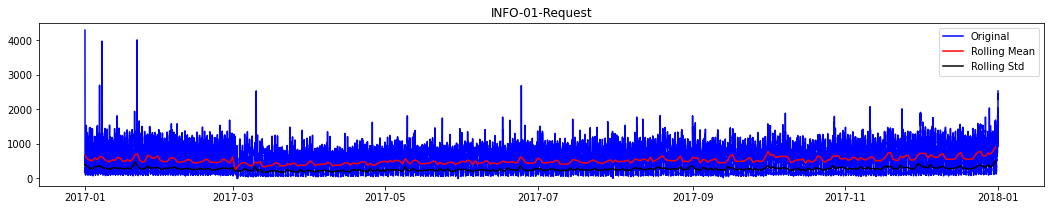

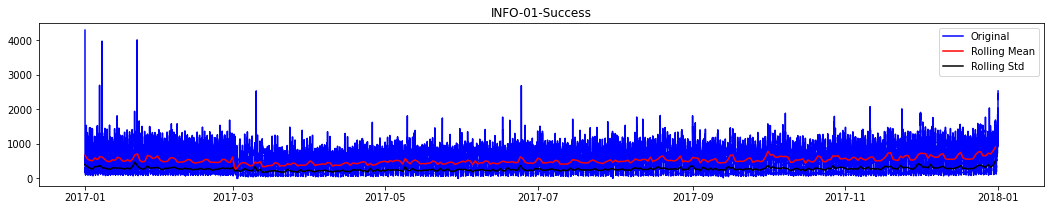

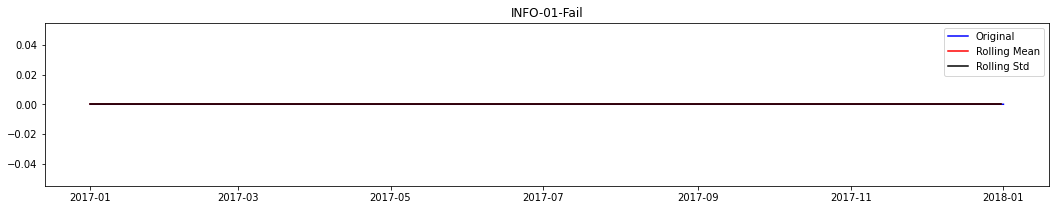

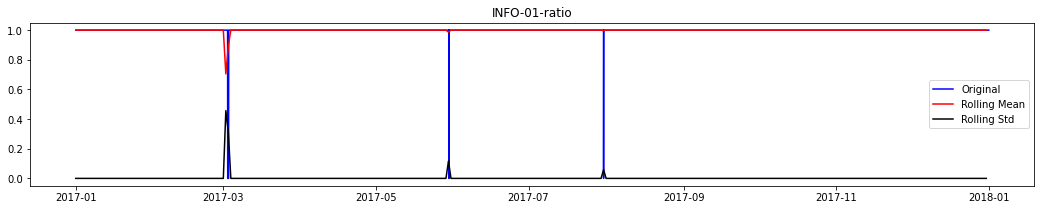

In [ ]:
# Resample the entire dataset by daily average
rollmean = info_data.resample(rule='D').mean()
rollstd = info_data.resample(rule='D').std()
# Plot time series for each sensor with its mean and standard deviation
for name in info_data.columns:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(info_data[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

# ADF Test

In [ ]:
def adf(data):
  adf_result = dict()
  for i in data.columns:
    result = adfuller(data[i],autolag='AIC')
    print(i)
    print(f'ADF Statics:{result[0]}')
    print(f'p-value:{result[1]}')
    if result[1] > 0.05 :
      print('정상 시계열이 아닙니다')
    print(f'n_lags:{result[2]}')
    adf_result[i] = result
  return adf_result

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
train_adf_result = []
for i in data_list:
  one_data_result = adf(i)
  train_adf_result.append(one_data_result)

INFO-01-Request
ADF Statics:-33.43501360124417
p-value:0.0
n_lags:69
INFO-01-Success
ADF Statics:-33.43501360124417
p-value:0.0
n_lags:69


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


INFO-01-Fail
ADF Statics:nan
p-value:nan
n_lags:0
INFO-01-ratio
ADF Statics:-25.246275210763674
p-value:0.0
n_lags:69
LOGIN-01-Request
ADF Statics:-30.57334106680374
p-value:0.0
n_lags:69
LOGIN-01-Success
ADF Statics:-32.098689718113064
p-value:0.0
n_lags:68
LOGIN-01-Fail
ADF Statics:-15.47872693077046
p-value:2.572871871289214e-28
n_lags:69
LOGIN-01-ratio
ADF Statics:-9.579465843526364
p-value:2.178078513187192e-16
n_lags:69
LOGIN-02-Request
ADF Statics:-30.895384151042204
p-value:0.0
n_lags:68
LOGIN-02-Success
ADF Statics:-32.242049039154736
p-value:0.0
n_lags:68
LOGIN-02-Fail
ADF Statics:-16.93878405846018
p-value:9.652723753423503e-30
n_lags:69
LOGIN-02-ratio
ADF Statics:-15.826290566123573
p-value:1.0064329291104372e-28
n_lags:47
LOGIN-03-Request
ADF Statics:-30.895375483396784
p-value:0.0
n_lags:68
LOGIN-03-Success
ADF Statics:-32.239207288411464
p-value:0.0
n_lags:68
LOGIN-03-Fail
ADF Statics:-15.719144678104094
p-value:1.3305025296950144e-28
n_lags:69
LOGIN-03-ratio
ADF Statics

In [ ]:
train_adf_result

In [ ]:
test_adf_result = []
for i in data_list_test:
  one_data_result = adf(i)
  test_adf_result.append(one_data_result)

INFO-01-Request
ADF Statics:-28.54887915586313
p-value:0.0
n_lags:69
INFO-01-Success
ADF Statics:-28.54887915586313
p-value:0.0
n_lags:69


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


INFO-01-Fail
ADF Statics:nan
p-value:nan
n_lags:0
INFO-01-ratio
ADF Statics:-43.620488913768384
p-value:0.0
n_lags:46
LOGIN-01-Request
ADF Statics:-37.64413347534033
p-value:0.0
n_lags:69
LOGIN-01-Success
ADF Statics:-37.470409897201414
p-value:0.0
n_lags:69
LOGIN-01-Fail
ADF Statics:-23.782905080267764
p-value:0.0
n_lags:69
LOGIN-01-ratio
ADF Statics:-8.15978367799991
p-value:9.209952744579454e-13
n_lags:69
LOGIN-02-Request
ADF Statics:-37.57954159710959
p-value:0.0
n_lags:69
LOGIN-02-Success
ADF Statics:-37.40987063509115
p-value:0.0
n_lags:69
LOGIN-02-Fail
ADF Statics:-24.31314072071908
p-value:0.0
n_lags:69
LOGIN-02-ratio
ADF Statics:-8.169486177369997
p-value:8.700378167575846e-13
n_lags:69
LOGIN-03-Request
ADF Statics:-37.570117349852964
p-value:0.0
n_lags:69
LOGIN-03-Success
ADF Statics:-37.42985397353457
p-value:0.0
n_lags:69
LOGIN-03-Fail
ADF Statics:-24.215501396640736
p-value:0.0
n_lags:69
LOGIN-03-ratio
ADF Statics:-8.204737864900759
p-value:7.074432011997242e-13
n_lags:69


correlation

In [ ]:
import seaborn as sns

def corrviz (data):
  for i in data:
    corr_df=i.corr()
    plt.figure(figsize=(20,20))
    ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
    plt.show()

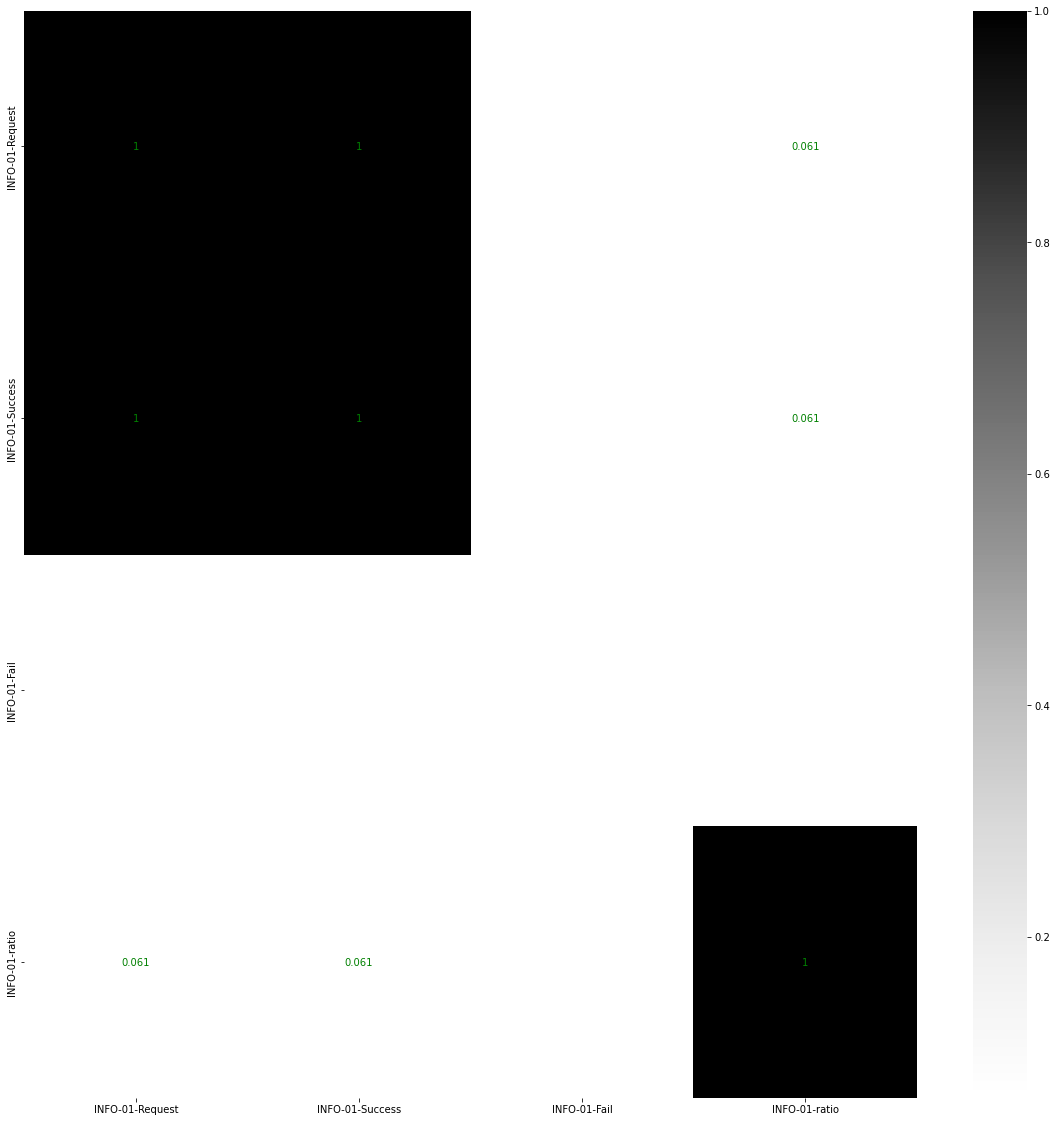

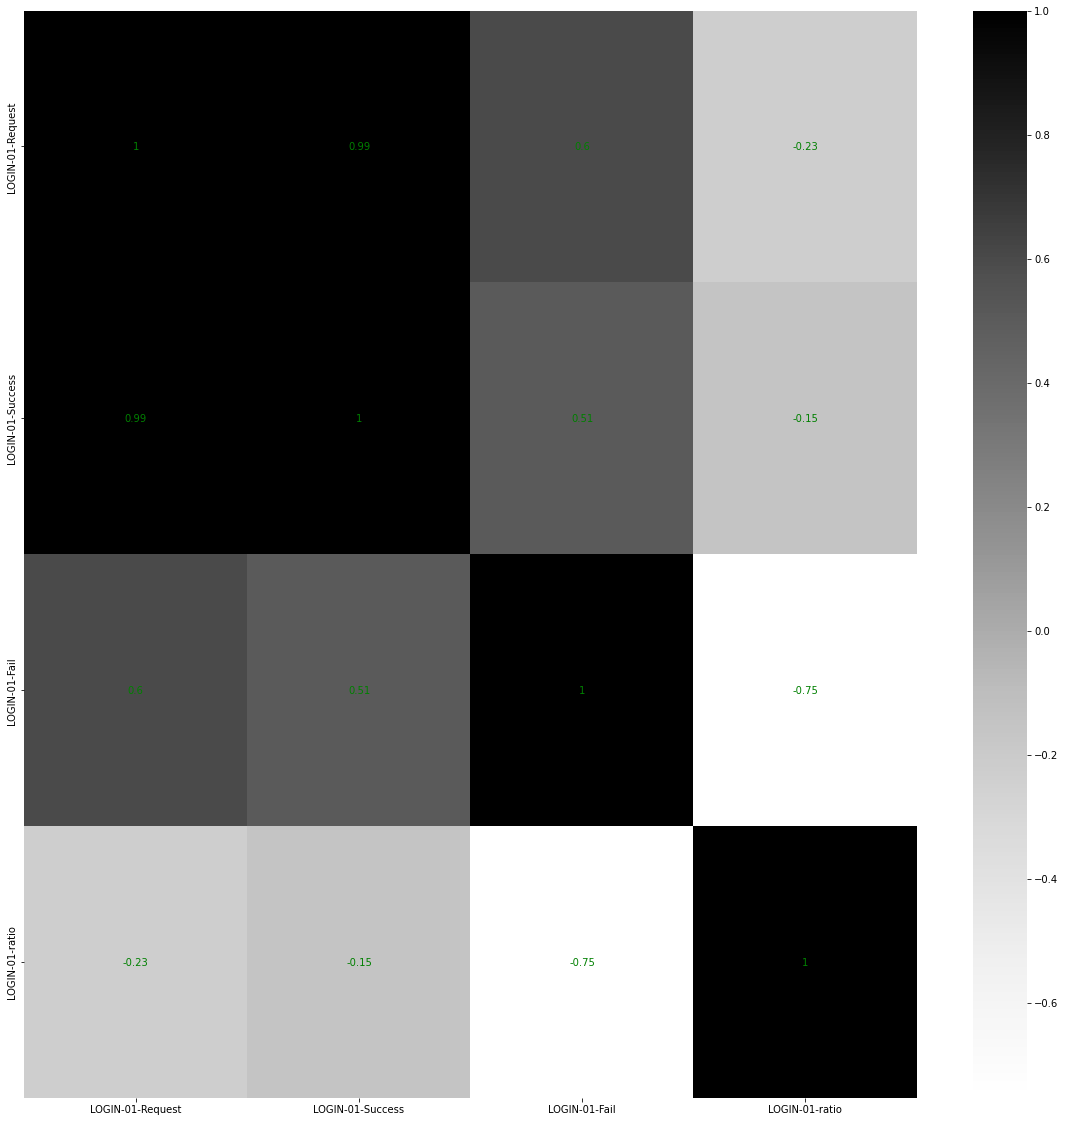

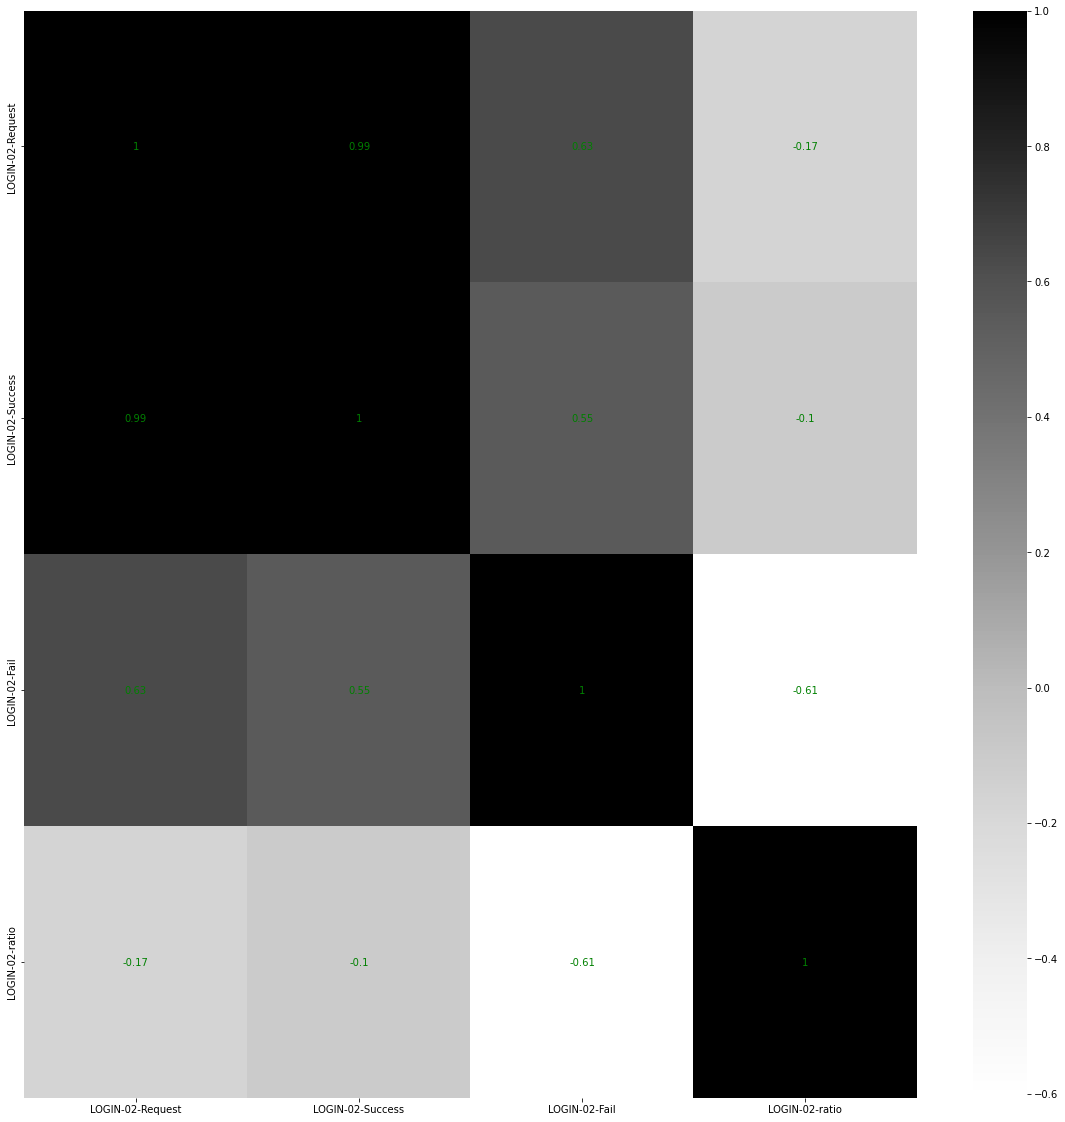

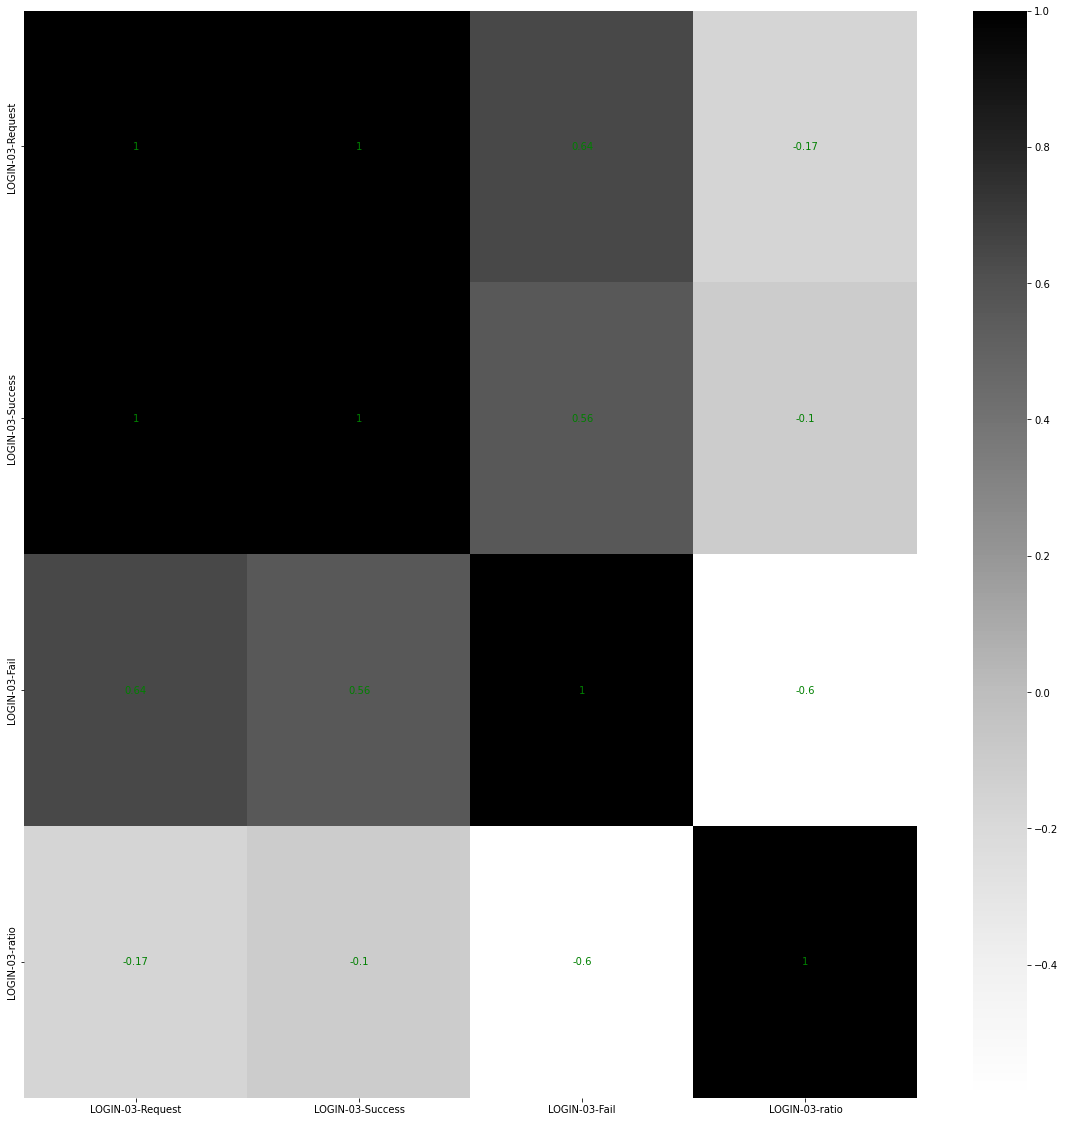

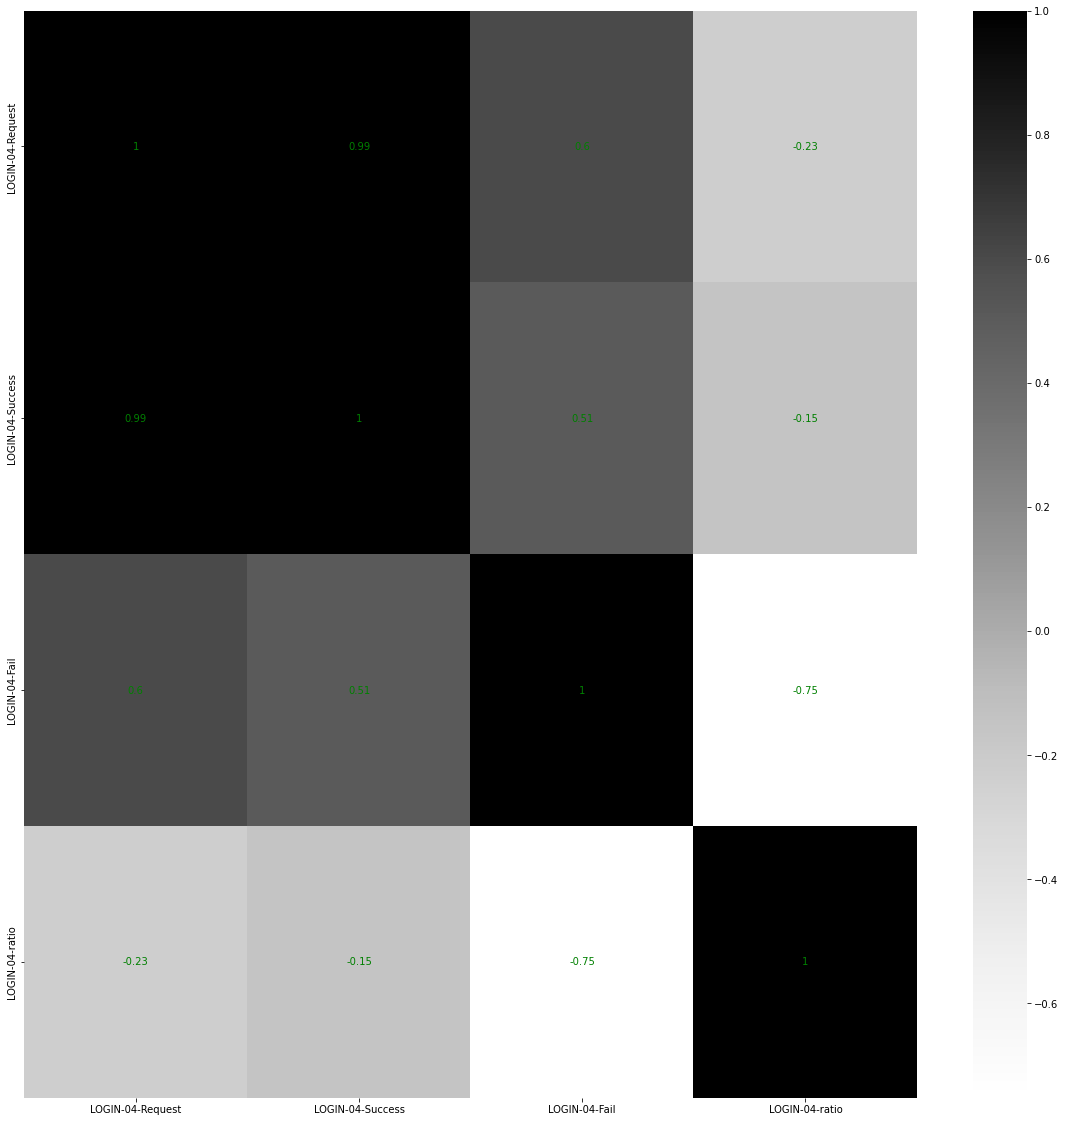

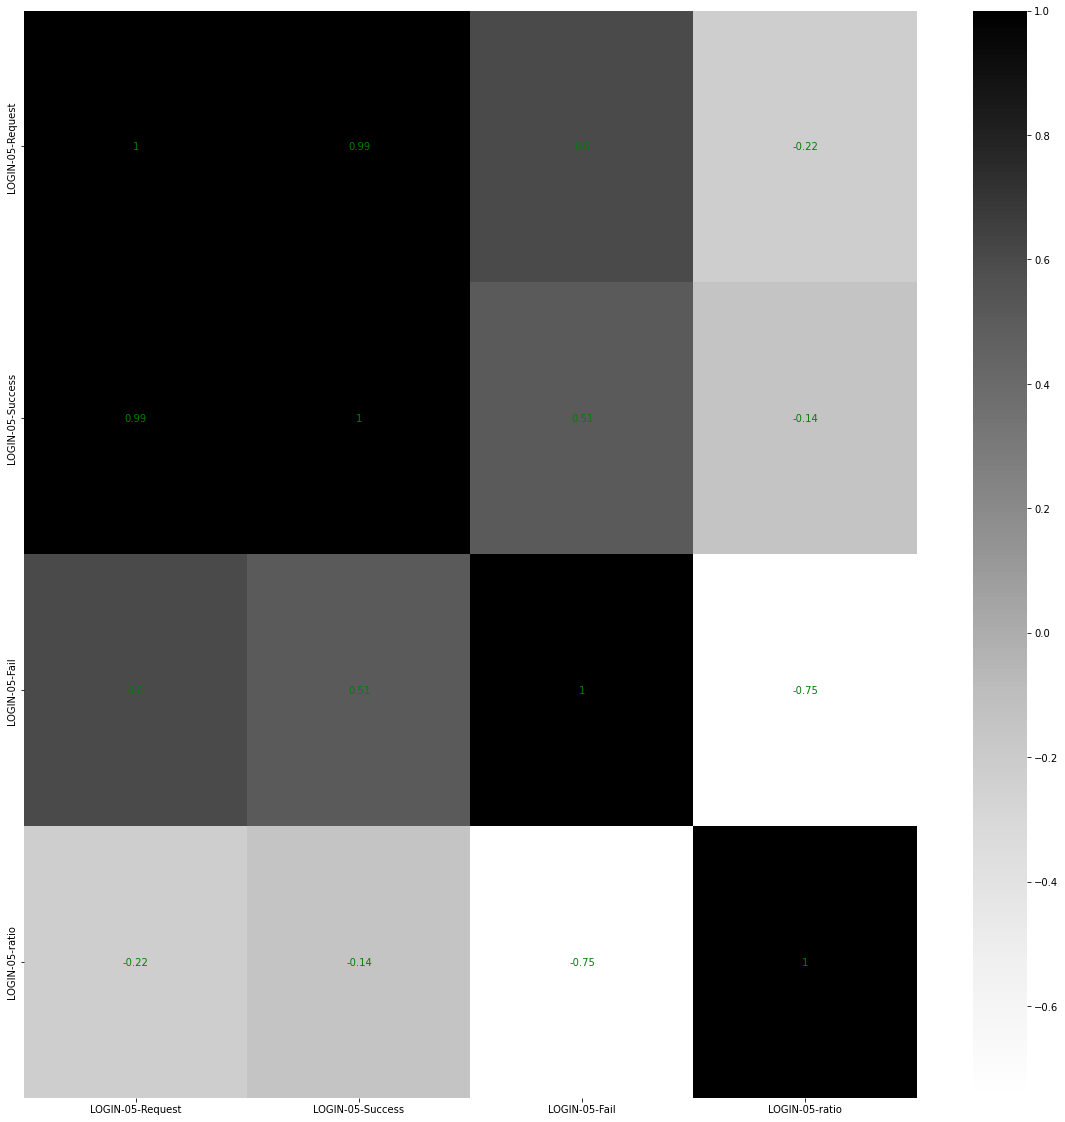

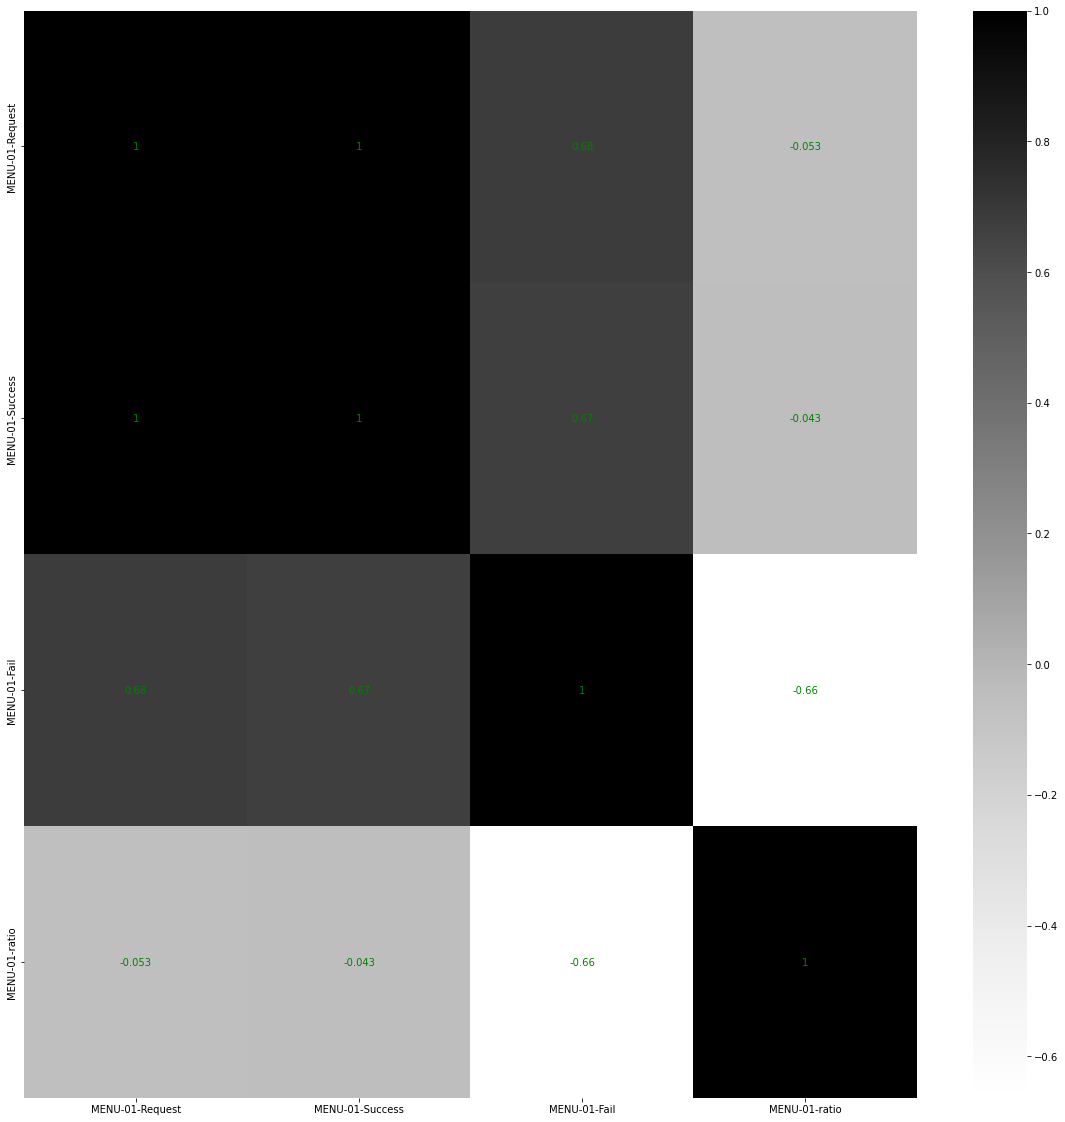

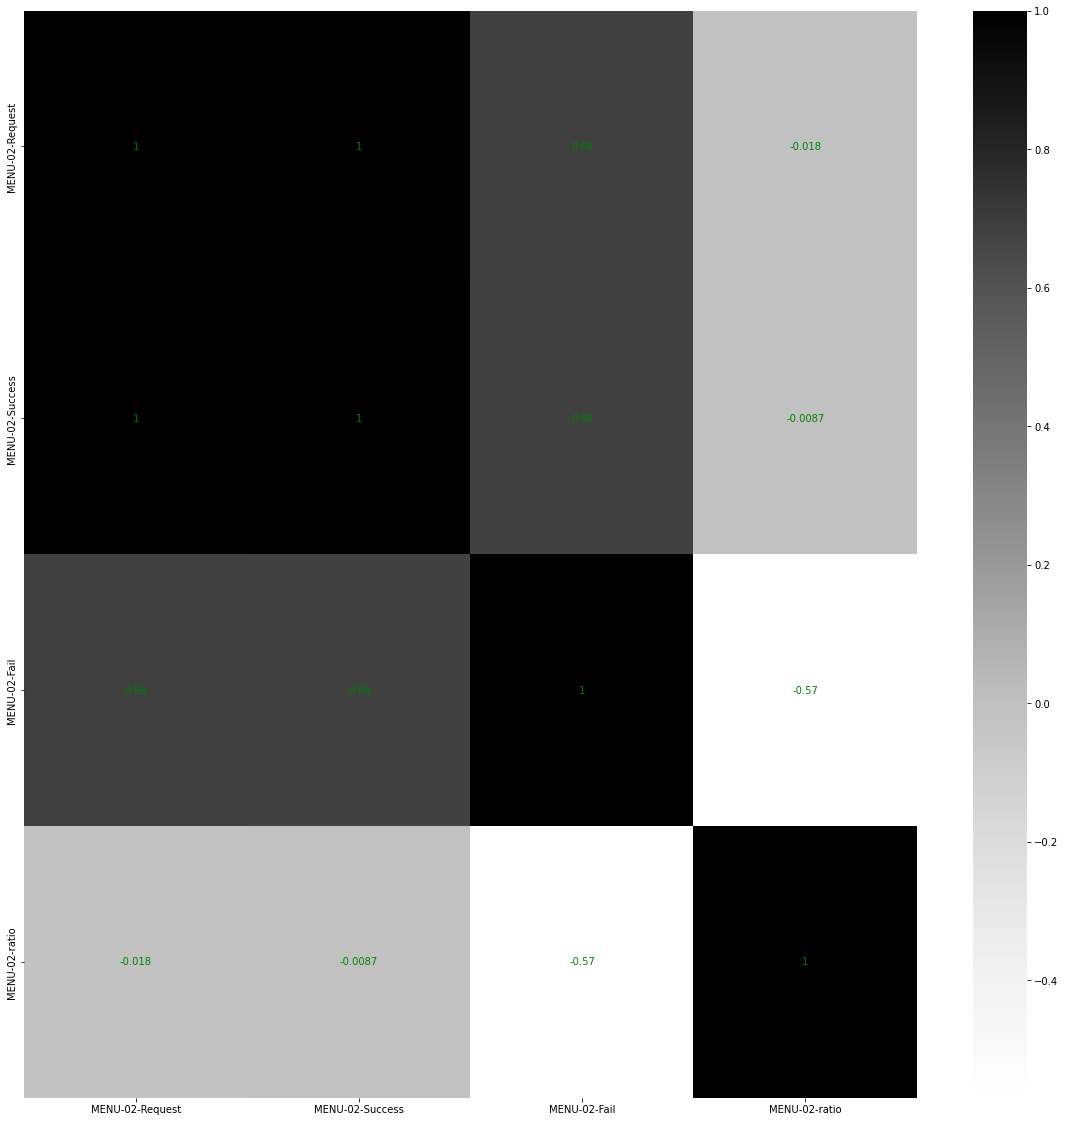

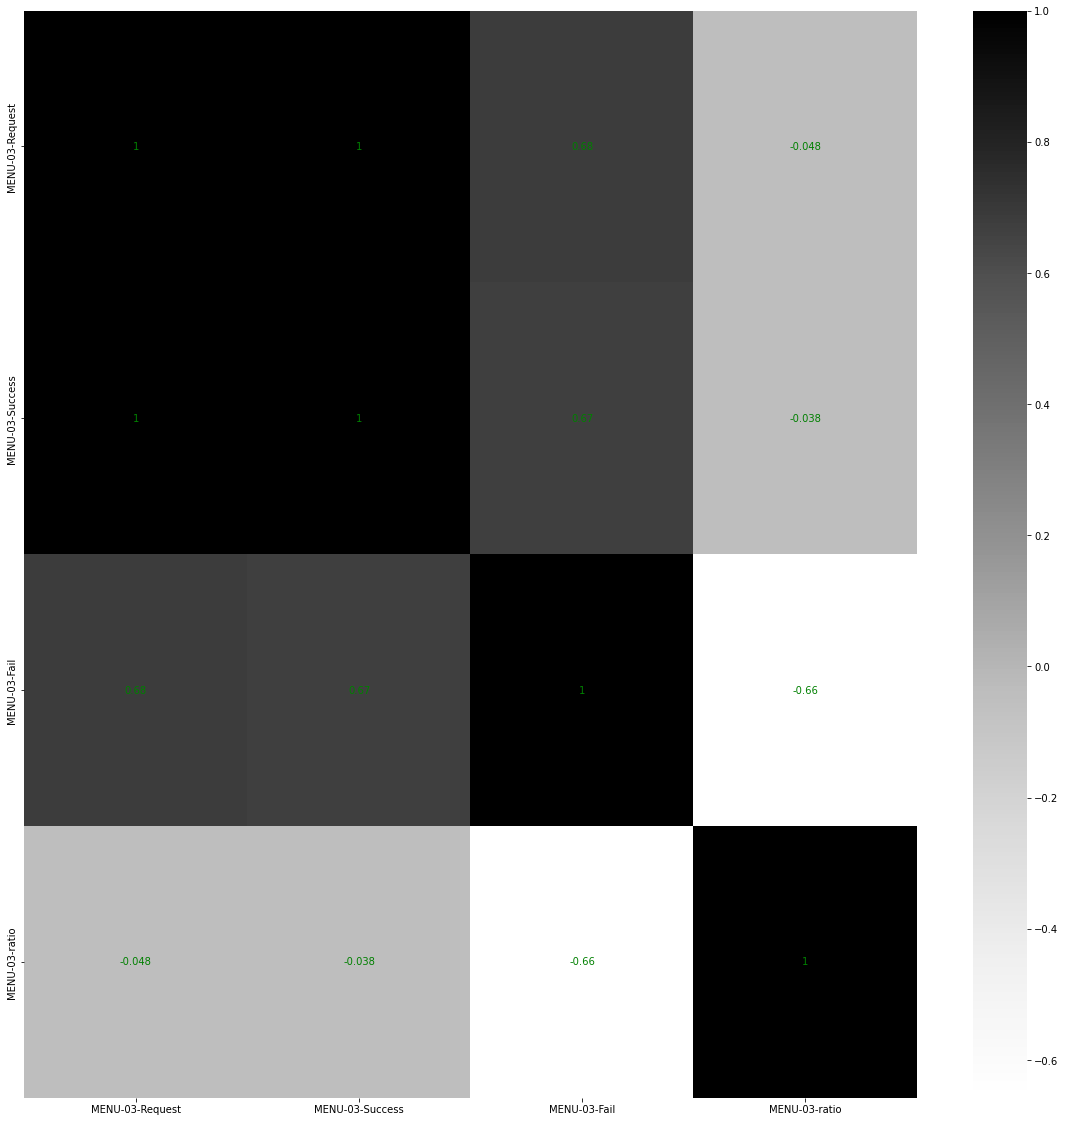

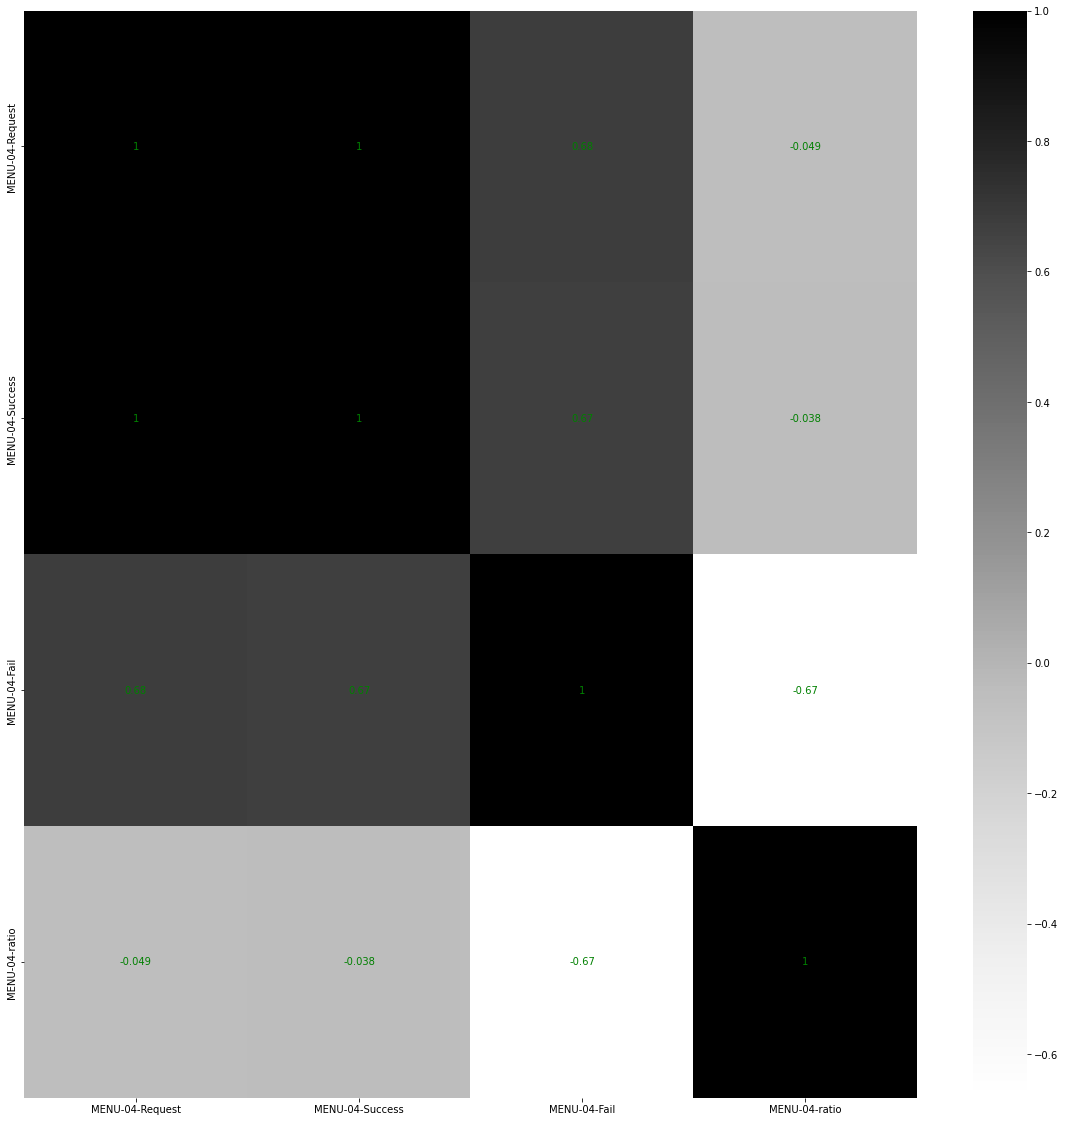

In [ ]:
try:
  corrviz(data_list)
except:
  pass

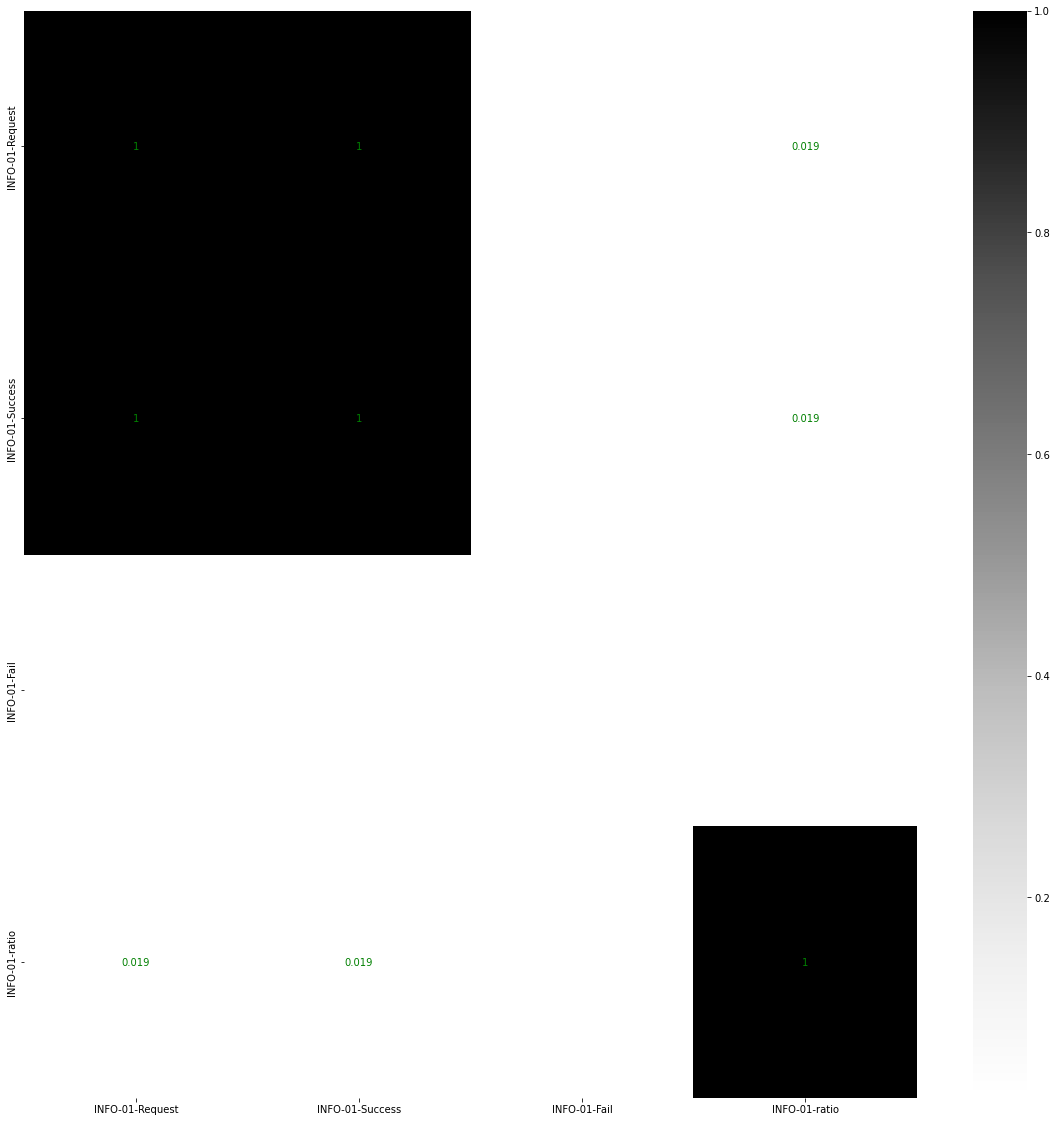

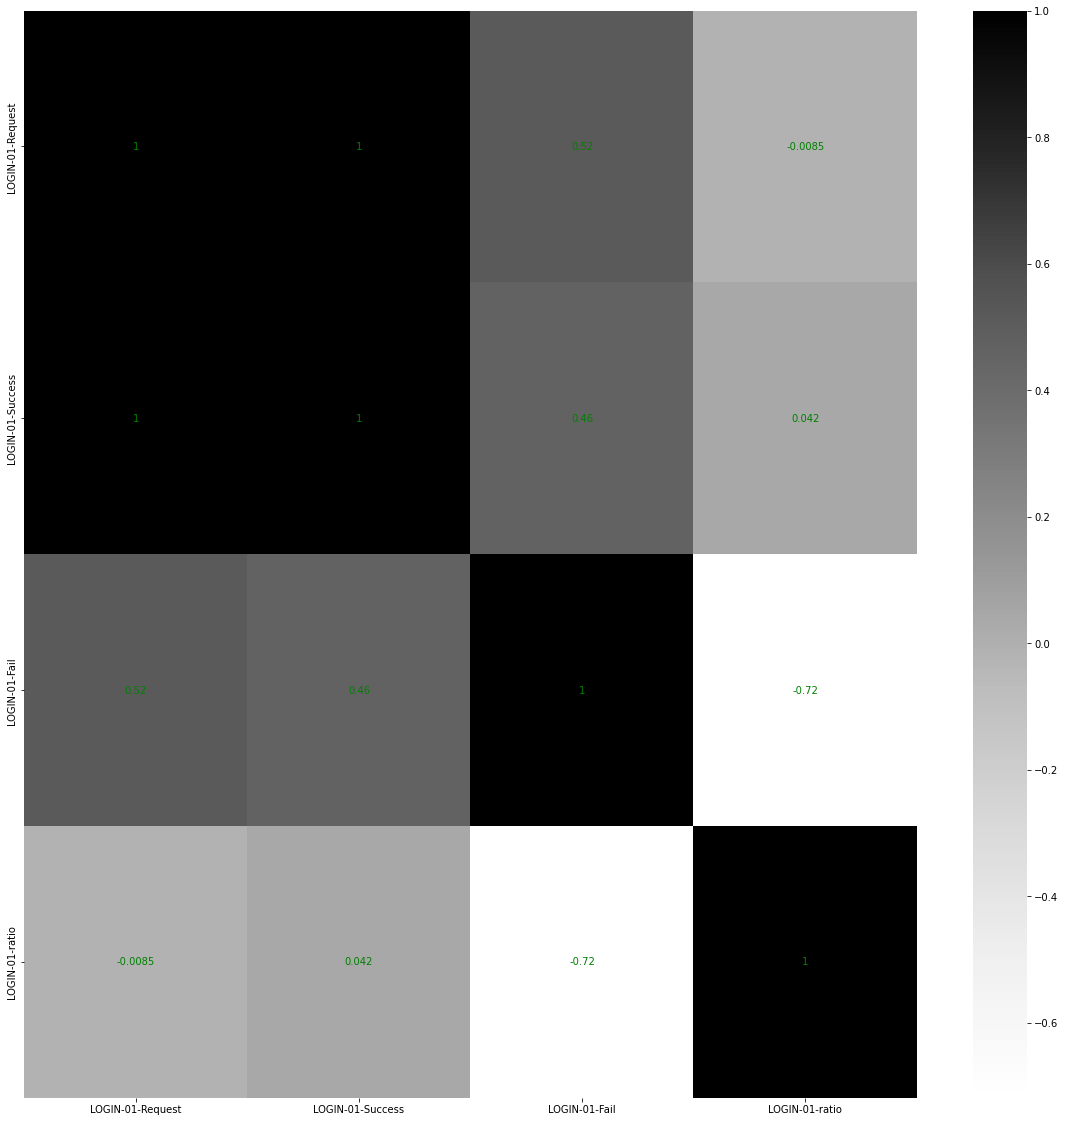

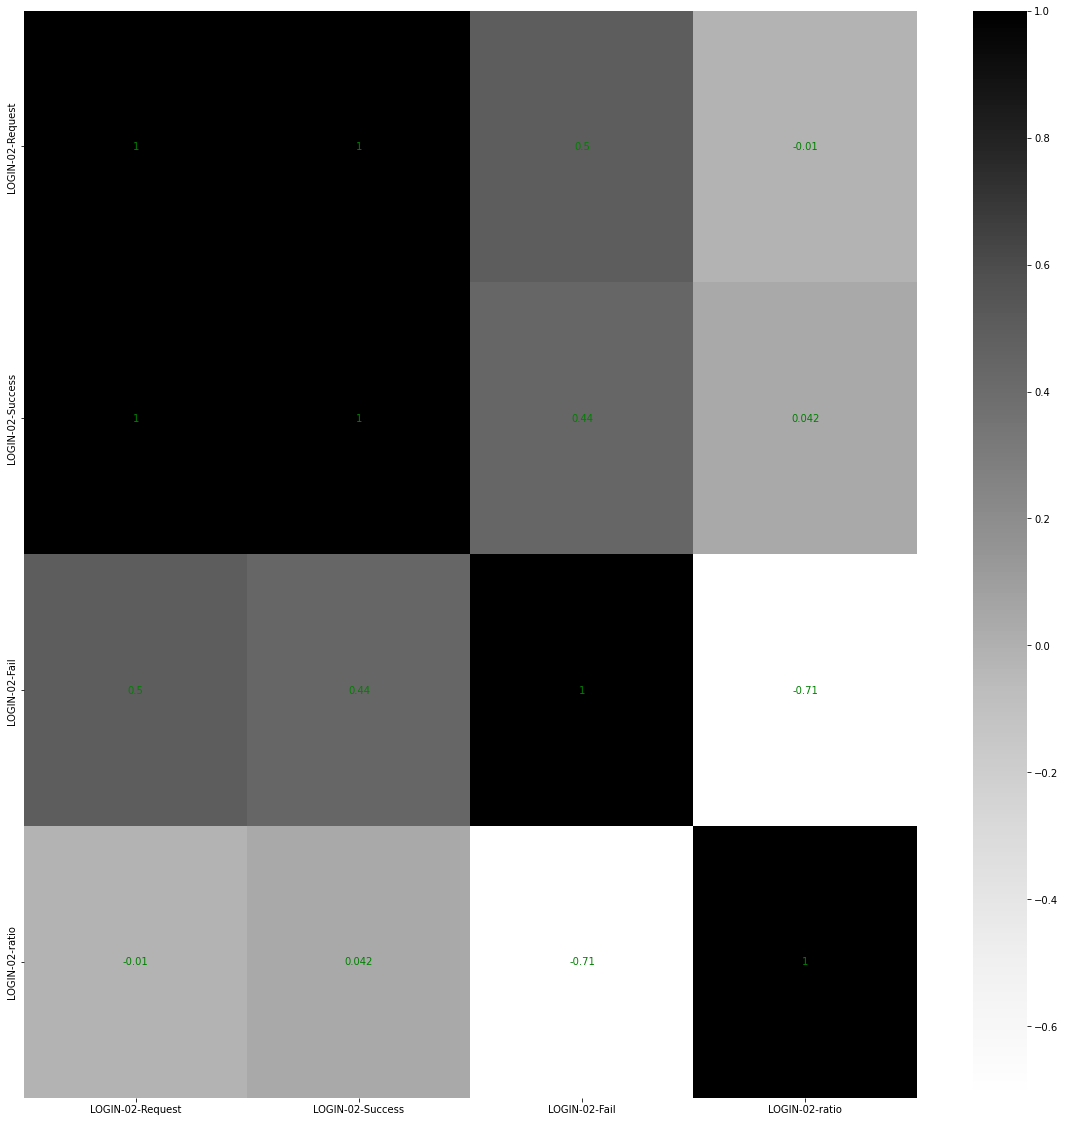

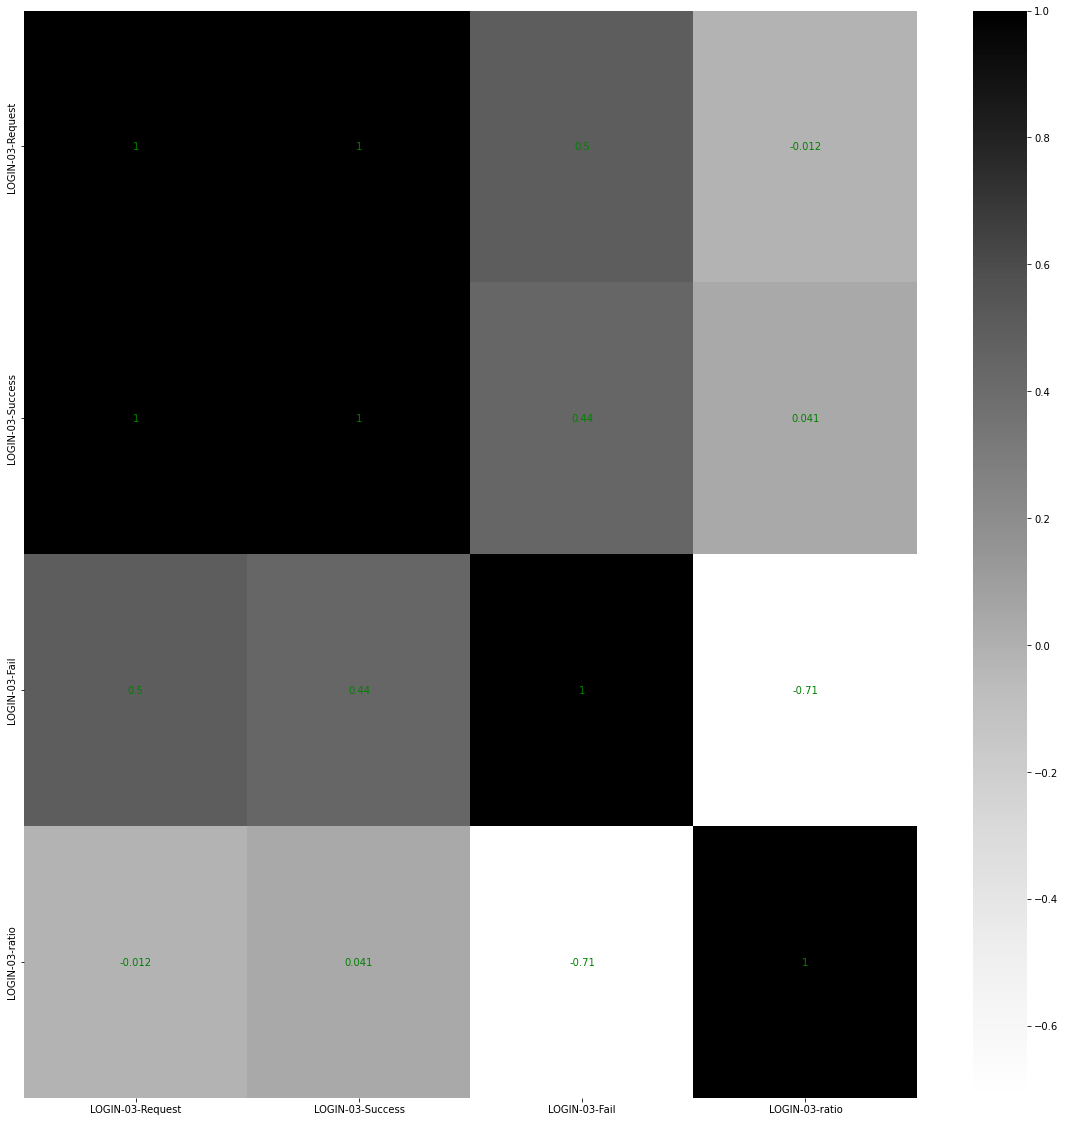

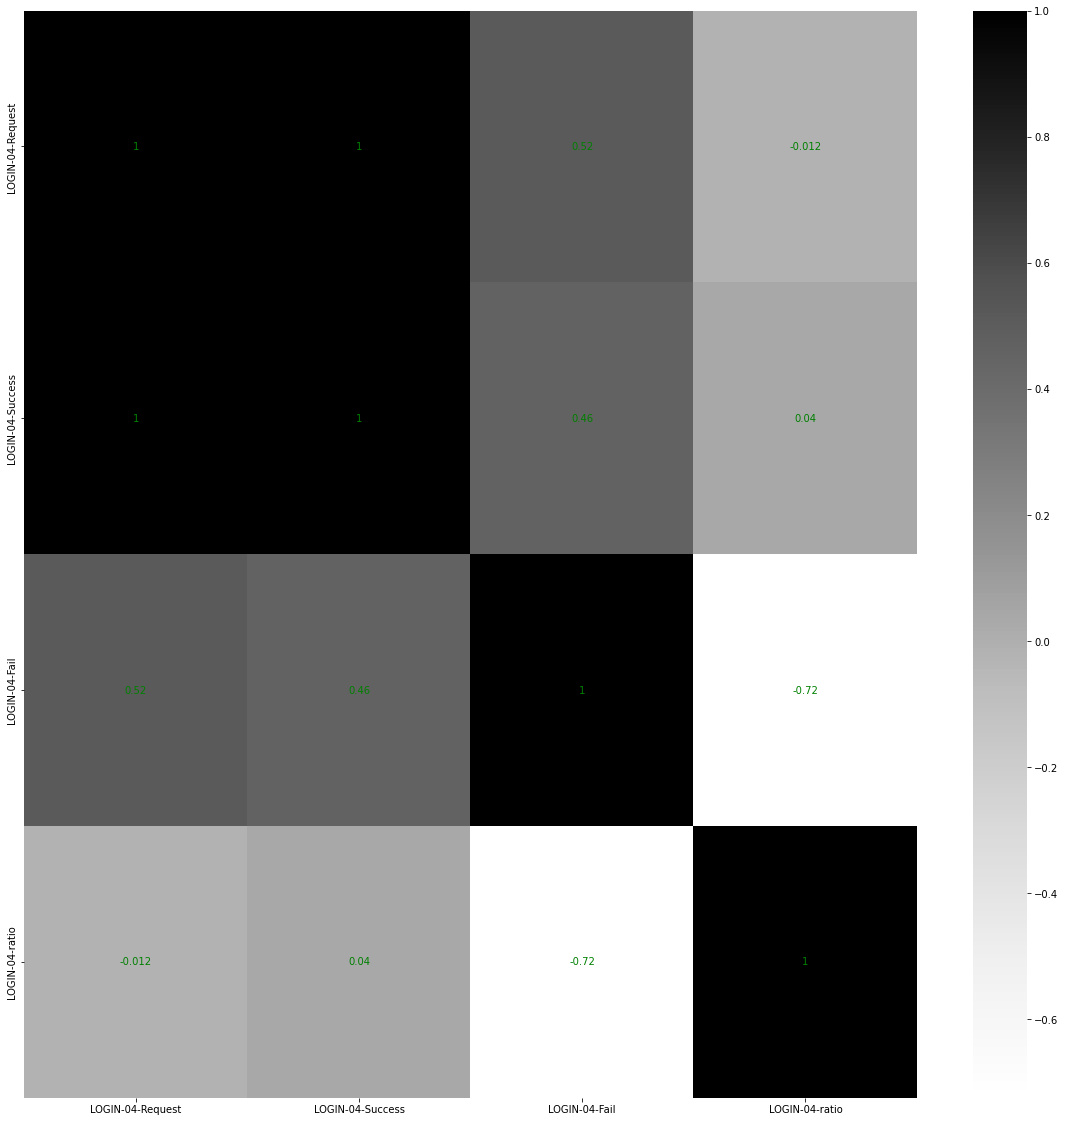

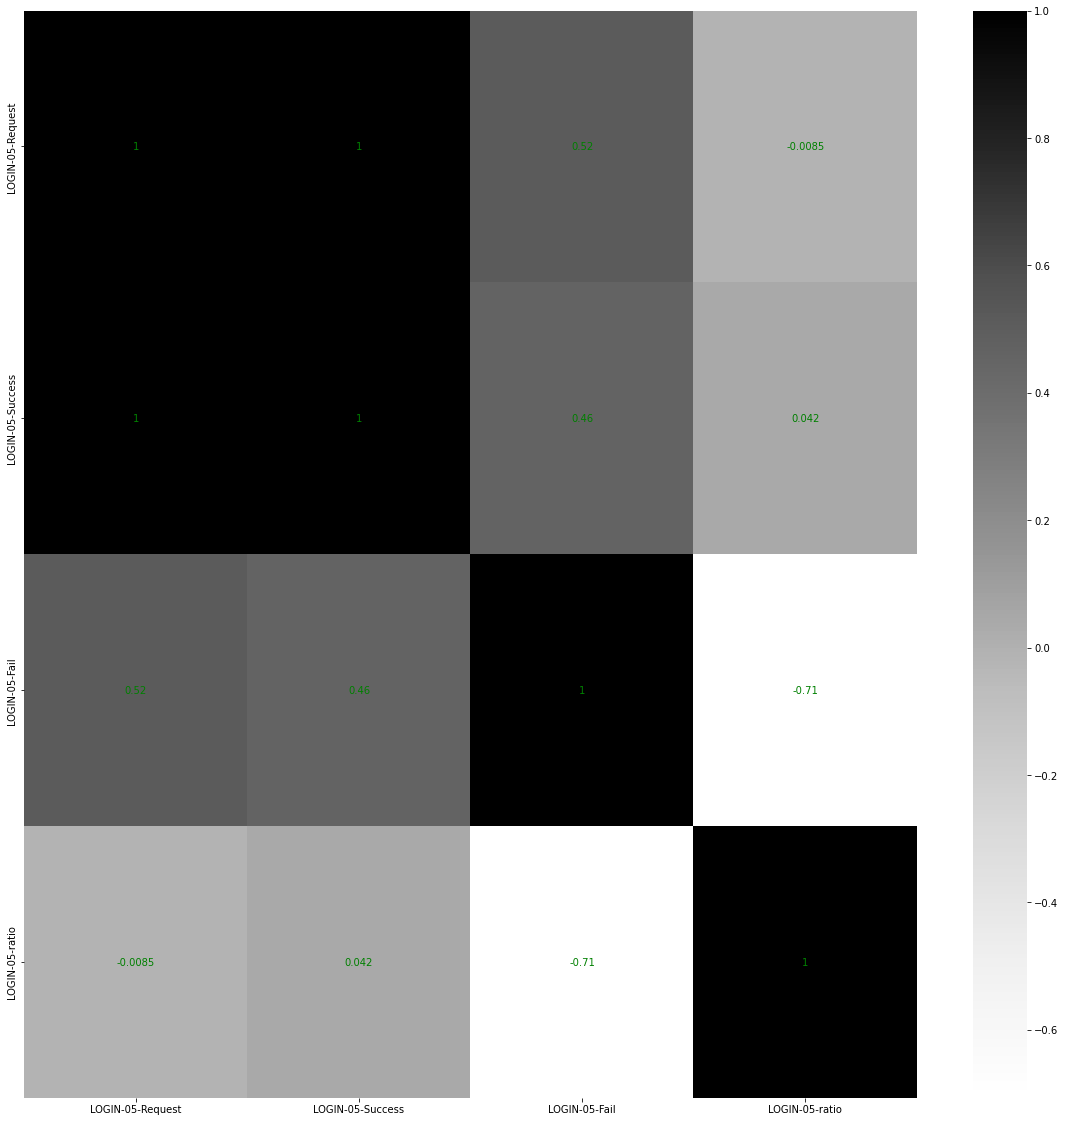

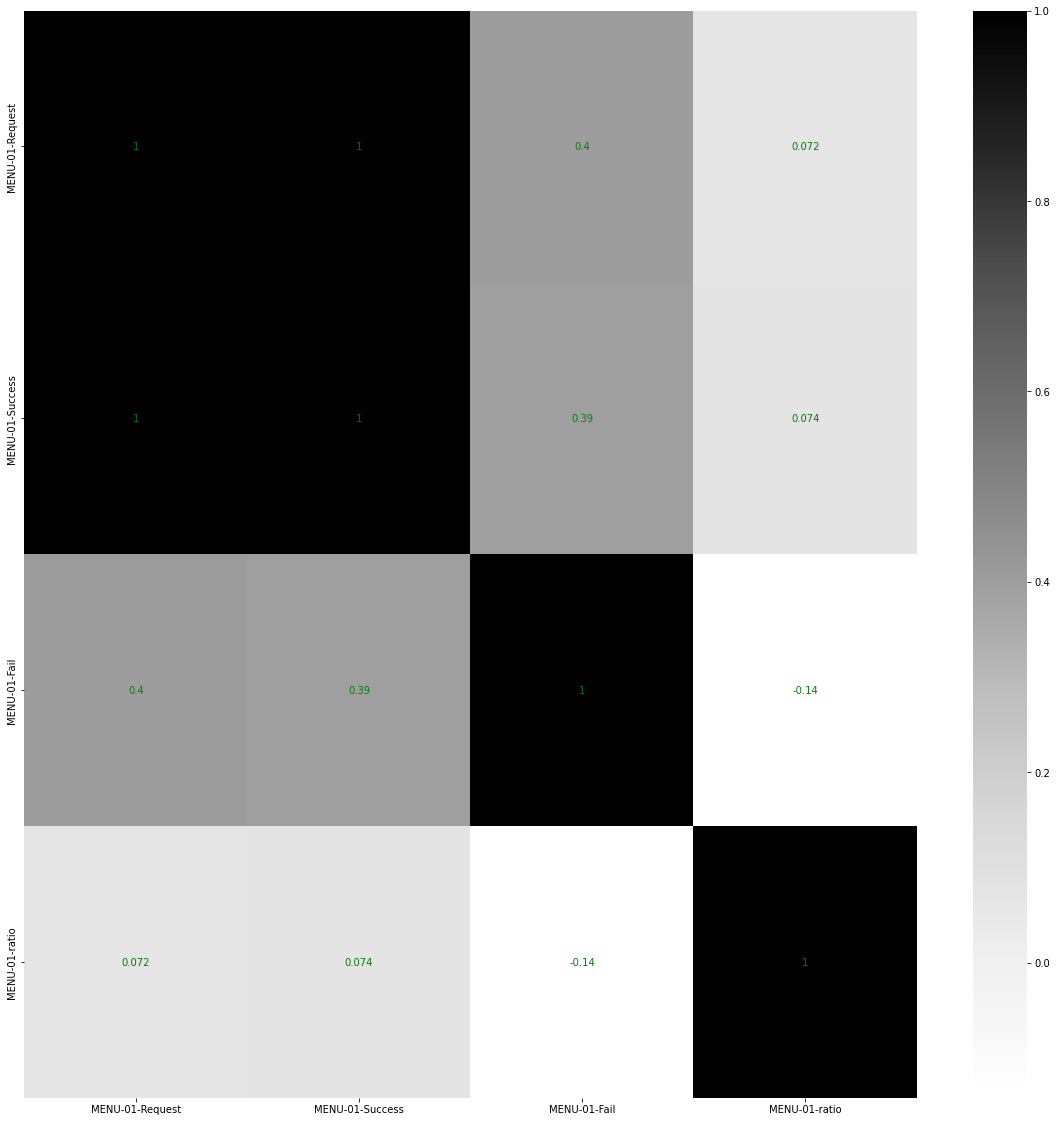

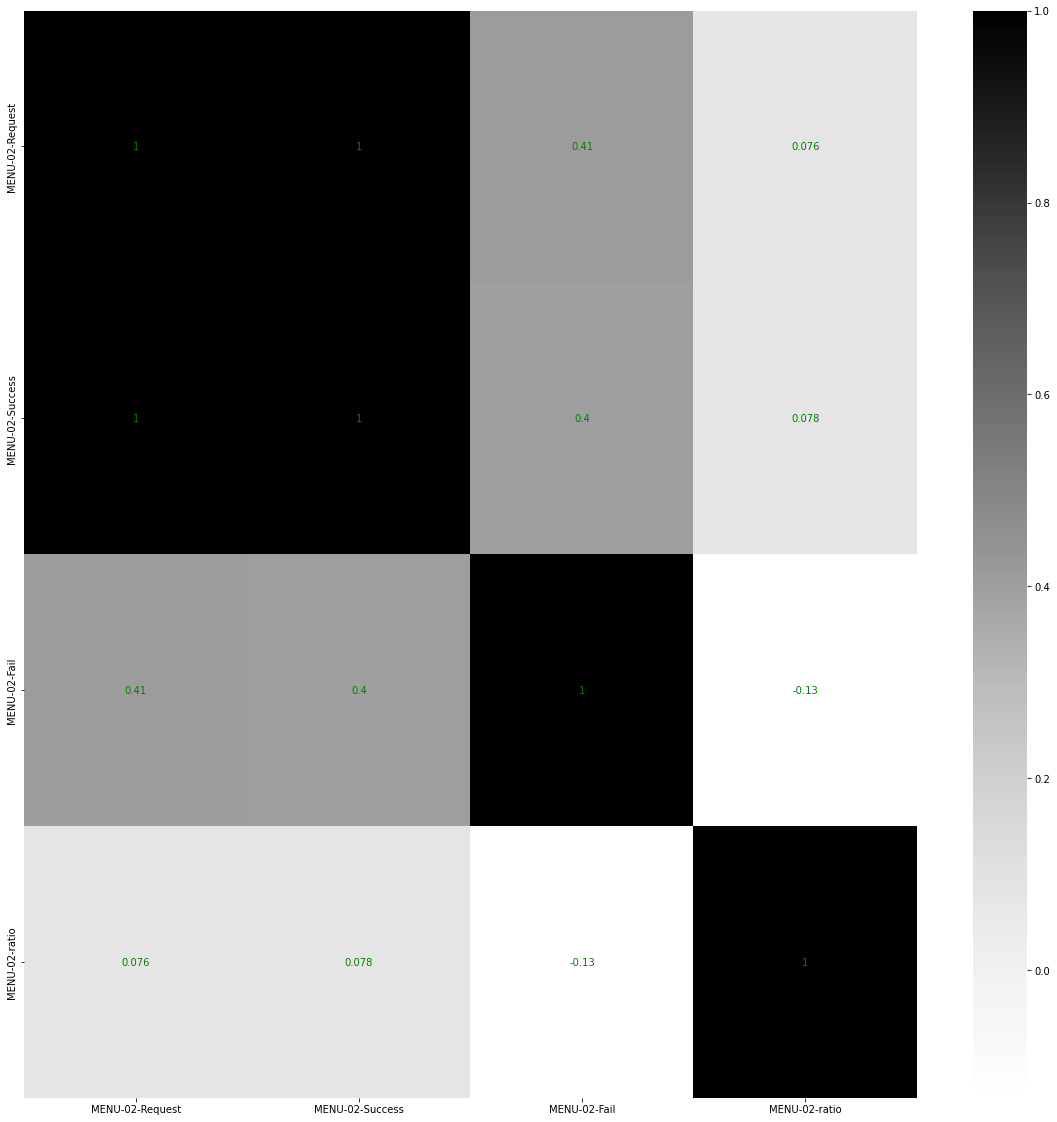

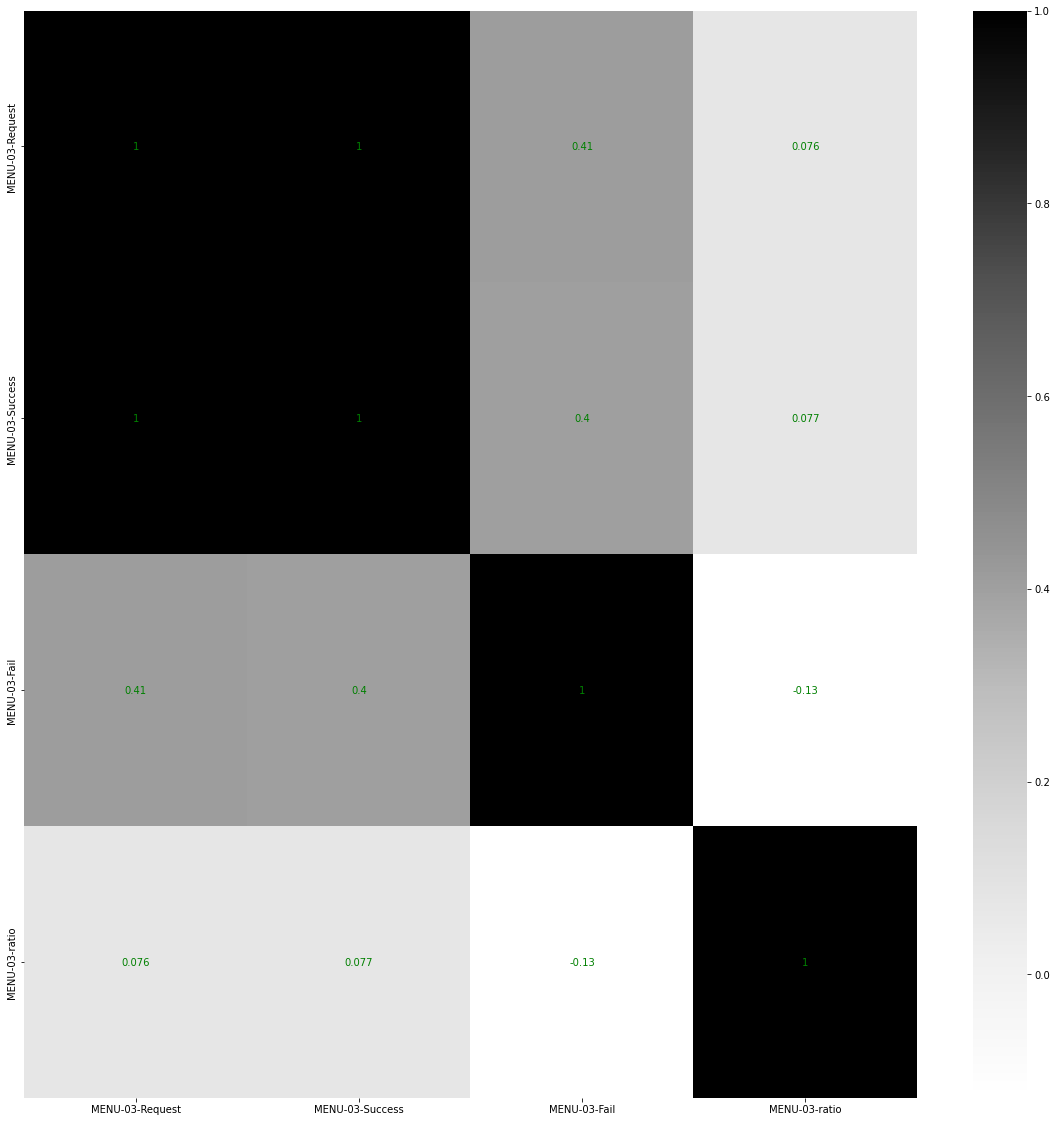

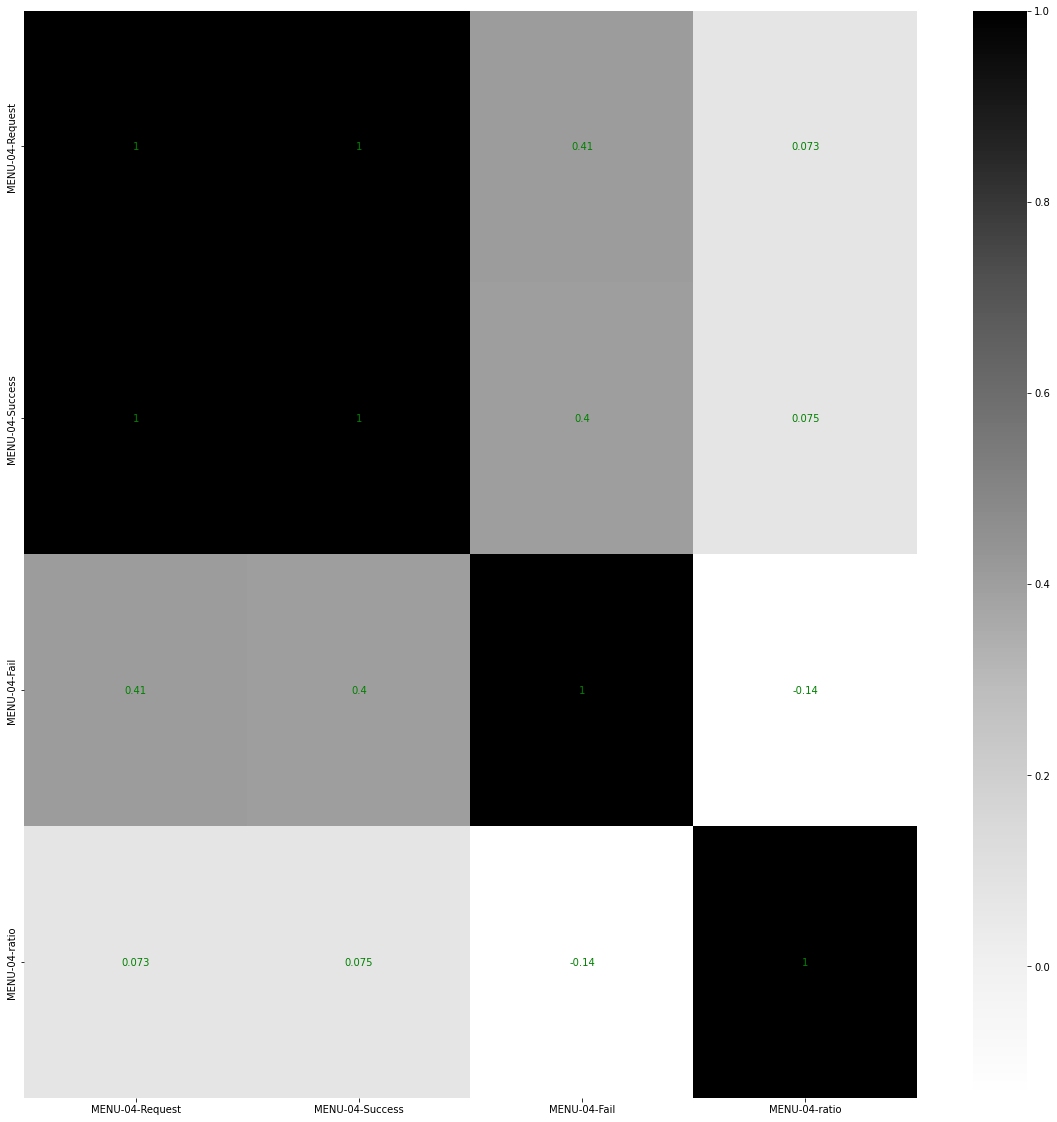

In [ ]:
try:
  corrviz(data_list_test)
except:
  pass

In [ ]:
def save_df(data):
  feature_list = ['info', 'login_1','login_2','login_3','login_4','login_5','menu_1','menu_2','menu_3','menu_4','session1','session2','session3']
  for s in range(len(feature_list)):
    save_data = pd.DataFrame(index=data[s].index)
    if 'session' in feature_list[s]:
      save_data = data[s]
    else:
      for i in data[s].columns:
        if 'Request' in i:
          save_data = pd.merge(save_data,data[s][i],on='Timestamp')
        if 'Fail' in i:
          save_data = pd.merge(save_data,data[s][i],on='Timestamp')
        if 'ratio' in i:
          save_data = pd.merge(save_data,data[s][i],on='Timestamp')
        
    
    save_data.to_csv('/content/drive/MyDrive/dmp/f_dataset/'+feature_list[s]+'.csv',index=True)

In [ ]:
save_df(data_list)
save_df(data_list_test)

In [ ]:
def save_df_not_fail(data):
  feature_list = ['info', 'login_1','login_2','login_3','login_4','login_5','menu_1','menu_2','menu_3','menu_4','session1','session2','session3']
  for s in range(len(feature_list)):
    save_data = pd.DataFrame(index=data[s].index)
    if 'session' in feature_list[s]:
      save_data = data[s]
    else:
      for i in data[s].columns:
        if 'Request' in i:
          save_data = pd.merge(save_data,data[s][i],on='Timestamp')
        if 'ratio' in i:
          save_data = pd.merge(save_data,data[s][i],on='Timestamp')
        
    
    save_data.to_csv('/content/drive/MyDrive/dmp/nf_dataset/'+feature_list[s]+'.csv',index=True)

In [ ]:
save_df_not_fail(data_list)
save_df_not_fail(data_list_test)

In [ ]:
train.to_csv('/content/drive/MyDrive/dmp/nf_dataset/not_null_train.csv',index=True)
test.to_csv('/content/drive/MyDrive/dmp/nf_dataset/not_null_test.csv',index=True)

In [ ]:
test.isnull().sum()

INFO-01-Request      0
INFO-01-Success      0
INFO-01-Fail         0
LOGIN-01-Request     0
LOGIN-01-Success     0
LOGIN-01-Fail        0
LOGIN-02-Request     0
LOGIN-02-Success     0
LOGIN-02-Fail        0
LOGIN-03-Request     0
LOGIN-03-Success     0
LOGIN-03-Fail        0
LOGIN-04-Request     0
LOGIN-04-Success     0
LOGIN-04-Fail        0
LOGIN-05-Request     0
LOGIN-05-Success     0
LOGIN-05-Fail        0
MENU-01-Request      0
MENU-01-Success      0
MENU-01-Fail         0
MENU-02-Request      0
MENU-02-Success      0
MENU-02-Fail         0
MENU-03-Request      0
MENU-03-Success      0
MENU-03-Fail         0
MENU-04-Request      0
MENU-04-Success      0
MENU-04-Fail         0
STREAM-01-Session    0
STREAM-02-Session    0
STREAM-03-Session    0
INFO-01-ratio        0
LOGIN-01-ratio       0
LOGIN-02-ratio       0
LOGIN-03-ratio       0
LOGIN-04-ratio       0
LOGIN-05-ratio       0
MENU-01-ratio        0
MENU-02-ratio        0
MENU-03-ratio        0
MENU-04-ratio        0
dtype: int6